### Sobel Transform + Canny Edge

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.image as mpimg

In [2]:
from early_analysis import *

Importing two images differing in convection size and boundary clarity

In [3]:
source_dir_1 = "/Users/johnmays/Documents/Wirth Lab/convection-cell-research/data/initial_convection_images"
source_dir_2 = "/Users/johnmays/Documents/Wirth Lab/convection-cell-research/data/LCB6mil90deg0_frames"
os.chdir(source_dir_1)
unclear_frame = mpimg.imread('frame1.png')
os.chdir(source_dir_2)
clear_frame = mpimg.imread('frame1.png')

Working with second image

##### Step 1: Grayscale & Downsize

In [4]:
clear_frame_gray = clear_frame[...,1]
height, width = np.shape(clear_frame_gray)
clear_frame_gray_downsized = cv.resize(clear_frame_gray, (int(width/4), int(height/4)), cv.INTER_AREA)
height, width = np.shape(clear_frame_gray_downsized)

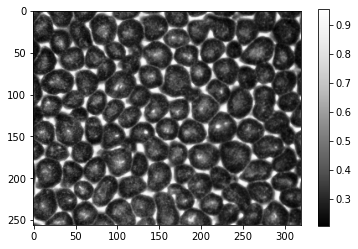

In [5]:
plt.imshow(clear_frame_gray_downsized, cmap='Greys_r')
plt.colorbar();

##### Step 2: Slight Gaussian Blur to get rid of noise

In [6]:
clear_frame_blur = cv.GaussianBlur(clear_frame_gray_downsized, (5,5), 0)

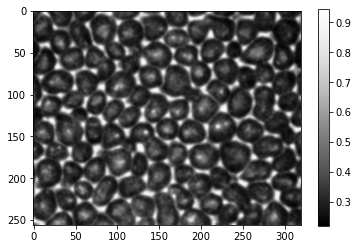

In [7]:
plt.imshow(clear_frame_blur, cmap='Greys_r')
plt.colorbar();

##### Step 3: Sobel Operators

In [8]:
clear_frame_sobel = cv.Sobel(clear_frame_blur, cv.CV_32F, 1, 0, ksize=3, borderType=cv.BORDER_DEFAULT)

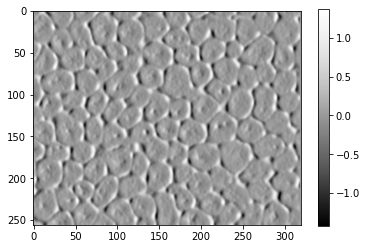

In [9]:
plt.imshow(clear_frame_sobel, cmap='Greys_r')
plt.colorbar();

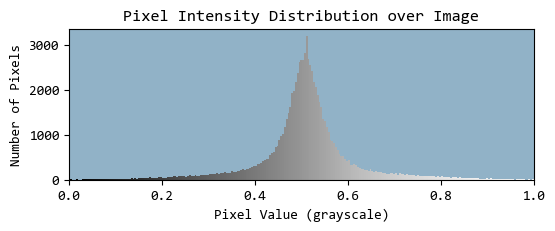

In [10]:
plotintensitydistribution(normalize(clear_frame_sobel))

##### Canny:

In [16]:
clear_frame_canny = cv.Canny(np.uint8(255*clear_frame_gray_downsized),30,230,3)

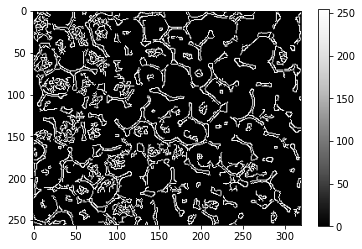

In [17]:
plt.imshow(clear_frame_canny, cmap='Greys_r')
plt.colorbar();

In [21]:
uppers = [210, 225, 240, 255] #incrementing by 15
lowers = [75, 100, 125, 150, 175, 200] #incrementing by 25

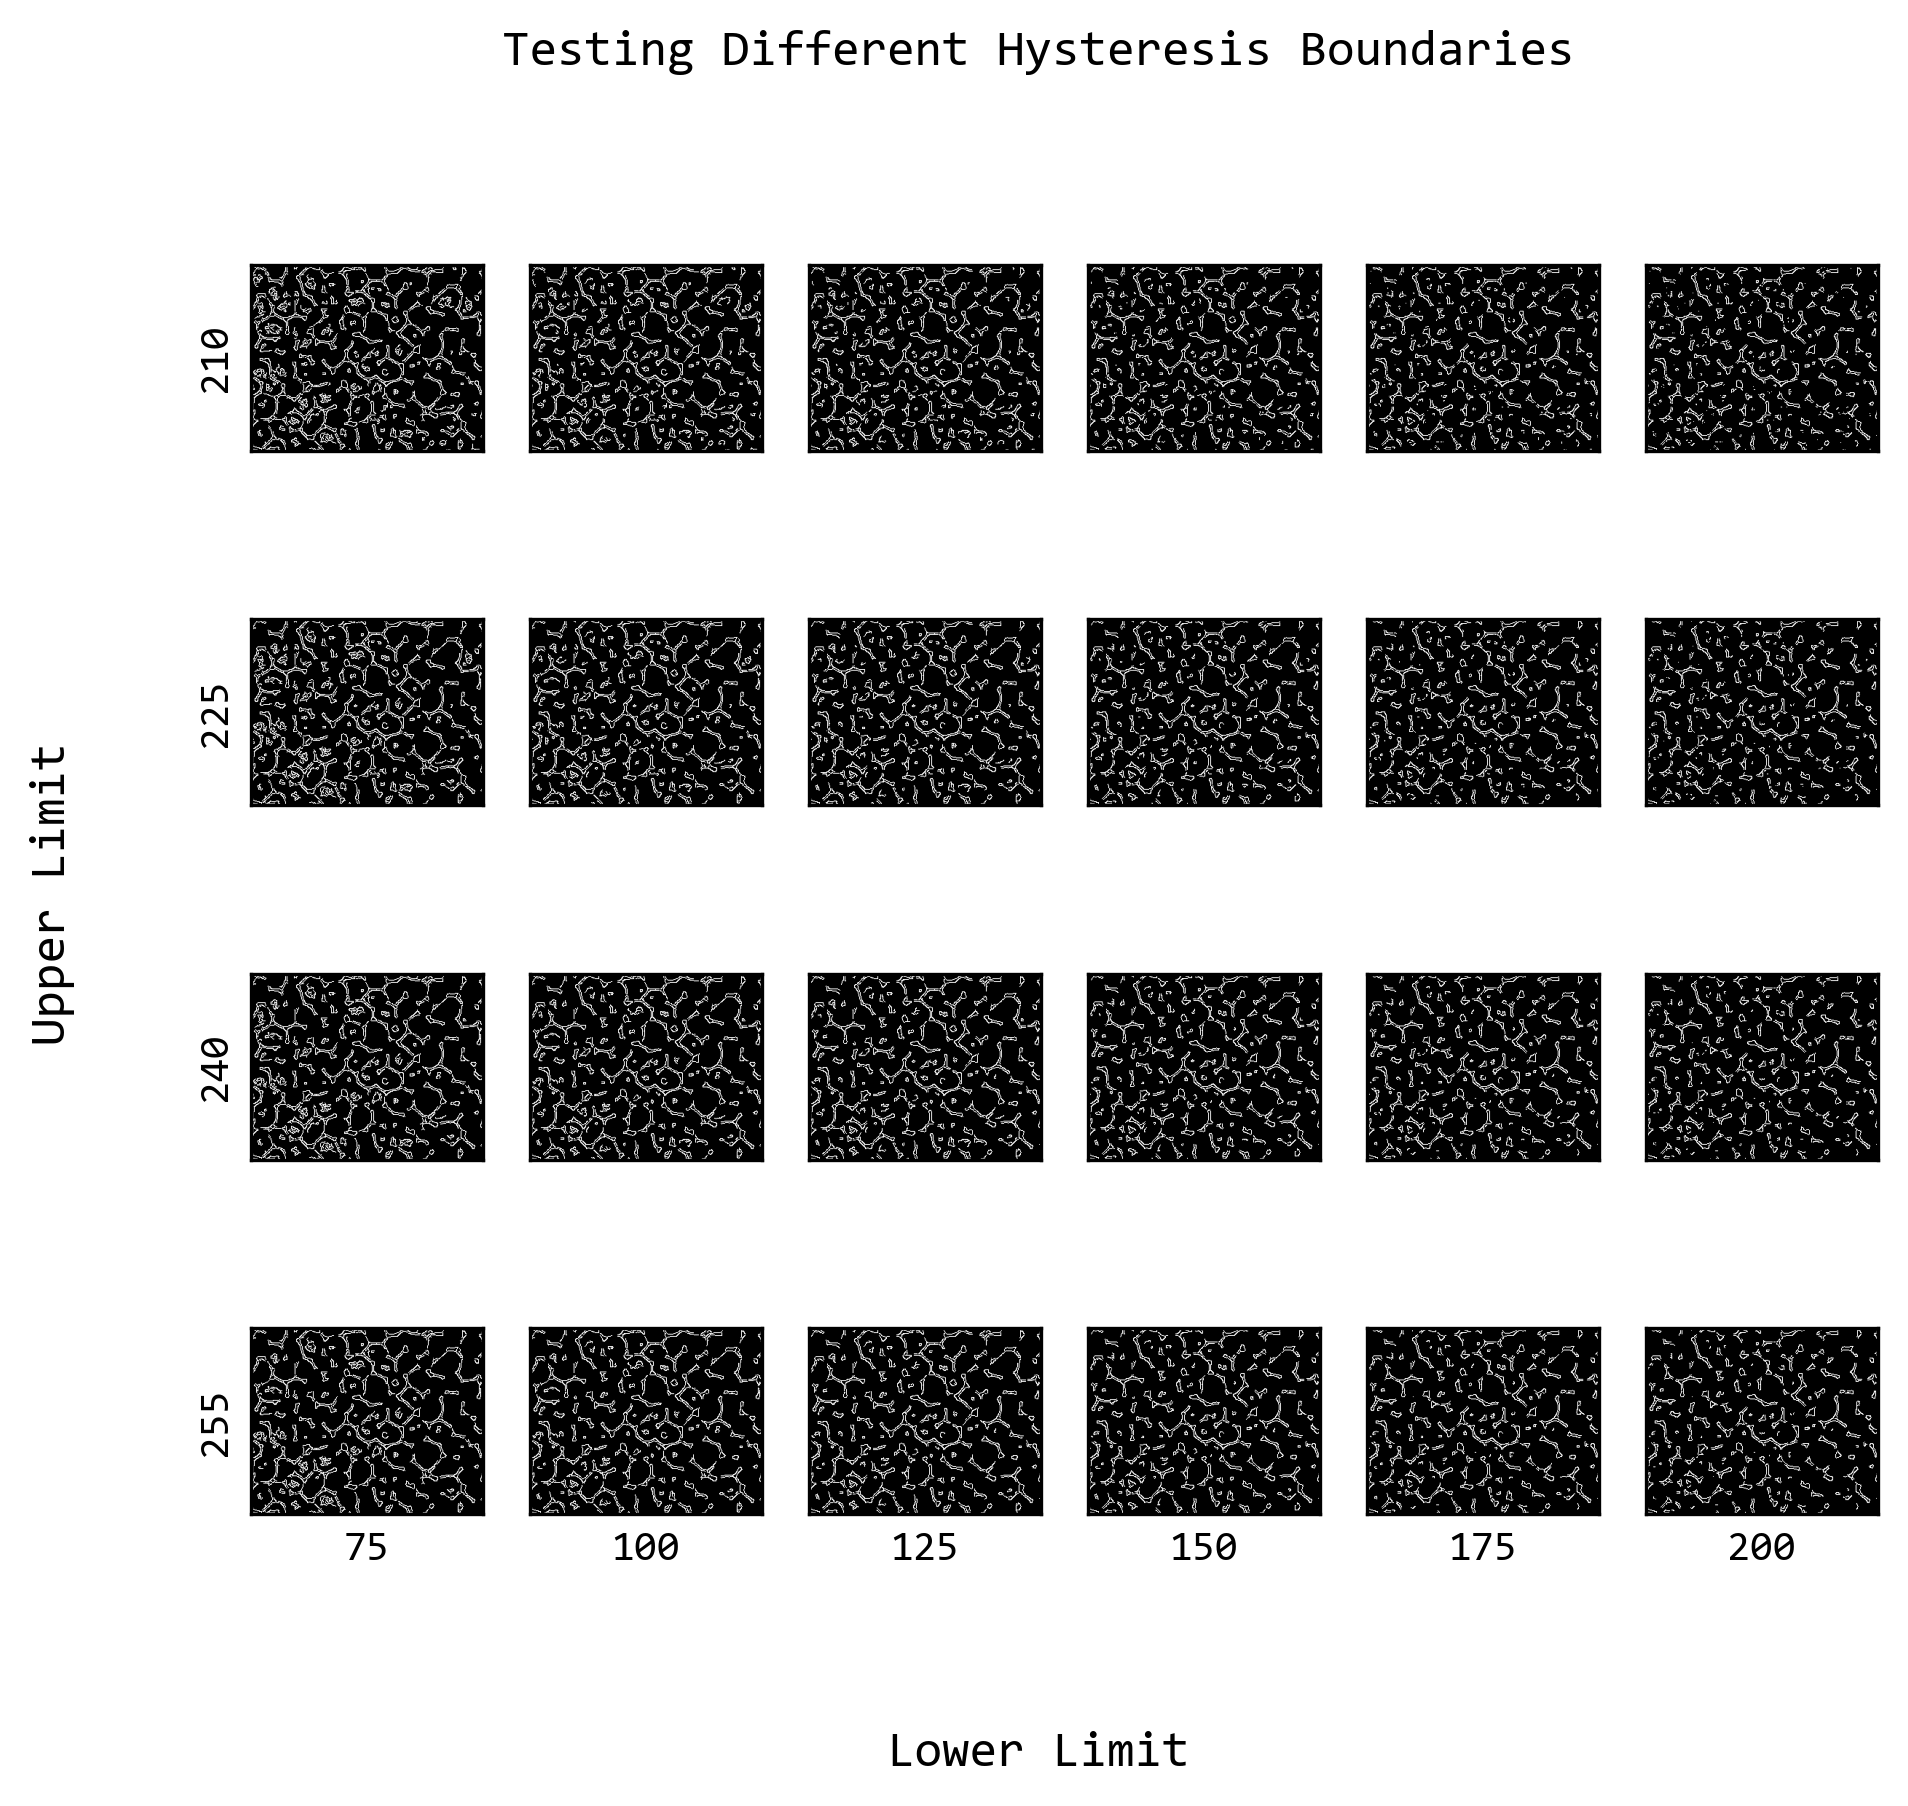

In [22]:
# upper limits on x axis, ascending
# lower limits on y axis, ascending

graphfont = {'fontname':'Consolas'}

fig, axes = plt.subplots(len(uppers), len(lowers), sharex='col', sharey='row', figsize = (7,6), dpi=300)
# fig.add_subplot(111, frameon=False)
fig.patch.set_facecolor('#ffffff')
for i in range(len(uppers)):
    for j in range(len(lowers)):
        clear_frame_matrix = cv.Canny(np.uint8(255*clear_frame_gray_downsized),lowers[j],uppers[i],3)
        axes[i,j].imshow(clear_frame_matrix, cmap = 'Greys_r')
        axes[i,j].set_xlabel(lowers[j], **graphfont)
        axes[i,j].set_ylabel(uppers[i], **graphfont)
for ax in axes.flat:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.label_outer()
# plt.xlabel(
# plt.ylabel(
fig.supxlabel("Lower Limit", **graphfont)
fig.supylabel("Upper Limit", **graphfont)
# plt.xticks([])
# plt.yticks([])
plt.suptitle("Testing Different Hysteresis Boundaries", **graphfont)
plt.show()
